<a href="https://colab.research.google.com/github/yazfir/Projects2021/blob/master/Probabilidad/DistribucionesContinuas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuciones Continuas

La distribución más famosa de las distribuciones continuas es la **"Distribución Normal"**
 

In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm 

## Distribución normal teórica


$$P(X) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{X-\mu}{\sigma} \right)^2 \right]}$$

* $\mu$: (mu) media de la distribución
* $\sigma$: (sigma) desviación estándar de la distribución

In [23]:
def gaussian(x, mu, sigma):
  return 1 / ( sigma * np.sqrt(2 * np.pi) ) * np.exp( -0.5 * ( (x - mu) / sigma) ** 2 )

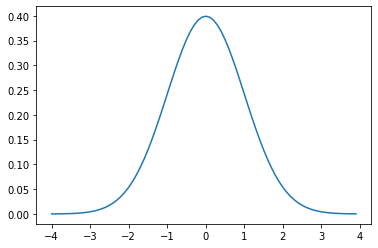

In [49]:
x = np.arange(-4,4,0.1)
y = gaussian(x, 0.0, 1.0)


#plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(x,y)

#y1 = gaussian(x, 1.0, 1.0)  # moviendo el promedio a 1
#plt.subplot(1, 2, 2) # row 1, col 2 index 2
#plt.plot(x,y1)



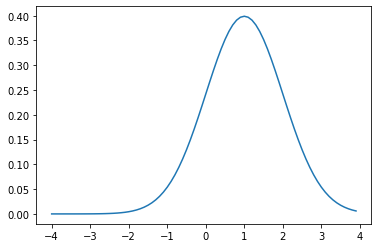

In [50]:
y1 = gaussian(x, 1.0, 1.0)  # moviendo el promedio a 1: "La función se desplaza"

plt.plot(x,y1)

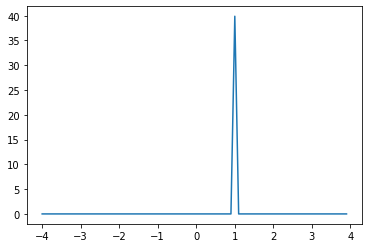

In [51]:
y2 = gaussian(x, 1.0, 0.01)  # Desviación estándar menor: "La gaussiana es mas delgada"

plt.plot(x,y2)

# Usando SCIPY

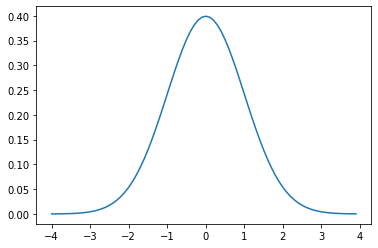

In [53]:
dist = norm(0,1)
x = np.arange(-4,4,0.1)
y = [dist.pdf(value) for value in x]

plt.plot(x,y)

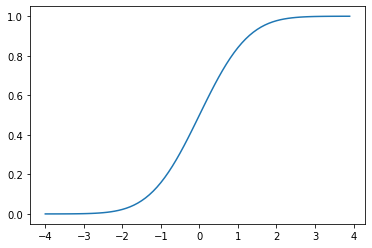

In [54]:
# Distribución Acumulada de Probabilidad para "Gaussiana", que es la integral de la fórmula normal teórica.
dist = norm(0,1)
x = np.arange(-4,4,0.1)
y = [dist.cdf(value) for value in x]

plt.plot(x,y)

## Distribución normal (gausiana) a partir de datos reales: "Población de Mosquitos"

* *El archivo excel* lo puedes descargar en esta página: https://seattlecentral.edu/qelp/sets/057/057.html ó https://seattlecentral.edu/qelp/sets/057/s057.xls

In [55]:
df = pd.read_excel('s057.xls')
df

,Normally Distributed Housefly Wing Lengths,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,"Sokal, R.R., and P.E.Hunter. 1955.",NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,length (x.1mm),NaN,NaN,NaN
3,36,NaN,Bin,Frequency
4,37,NaN,36-38,2
...,...,...,...,...
98,52,NaN,NaN,NaN
99,53,NaN,NaN,NaN
100,53,NaN,NaN,NaN
101,54,NaN,NaN,NaN


In [56]:
df['Normally Distributed Housefly Wing Lengths'].values

array(['Sokal, R.R., and P.E.Hunter. 1955. ', nan, 'length (x.1mm)', 36,
       37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42,
       42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44,
       44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50,
       50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55],
      dtype=object)

In [58]:
df['Normally Distributed Housefly Wing Lengths'].values[3:]

array([36, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42,
       42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50,
       50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55],
      dtype=object)

In [59]:
arr = df['Normally Distributed Housefly Wing Lengths'].values[3:]
np.unique(arr, return_counts=True) # Esta función sirve para obtener los valores únicos y además contar las veces que se repite cada uno. (Valores Únicos, Frecuencias). Devuelve 2 arreglos

(array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 54, 55], dtype=object),
 array([ 1,  1,  2,  2,  4,  6,  7,  8,  9, 10, 10,  9,  8,  7,  6,  4,  2,
         2,  1,  1]))

<BarContainer object of 20 artists>

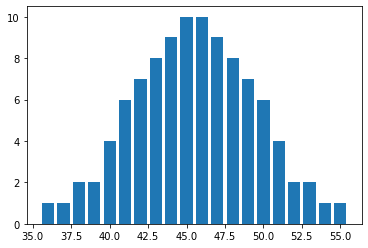

In [60]:
values, dist = np.unique(arr, return_counts=True)
plt.bar(values, dist)

## Estimación de una Distribución

<BarContainer object of 20 artists>

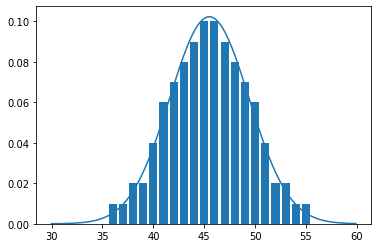

In [64]:
mu = arr.mean()
sigma = arr.std()
x = np.arange(30,60, 0.1)  # Entre 30 y 60 que son aproximadamente el mínimo y máximo de la gráfica anterior o valores del muestreo. Se parados por un valor de 0.1
dist = norm(mu, sigma)
y = [dist.pdf(value) for value in x]

plt.plot(x,y)

values, dist = np.unique(arr, return_counts=True)
plt.bar(values, dist/len(arr))       # Los conteos (dist) se normalizan diviendo entre el número de eventos exitosos 

## Otras Distribuciones:

*   Exponencial
*   Pareto
*   ...

